## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [1]:
def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
        
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    # Read in the file
    file = open(file_path, "r") 
    file_lines = file.readlines()
    
    chunks = []
    for chunk in file_lines:
        data = chunk.split(",")
        for chun in data:
            chunks.append(chun)

            #replace("\n")

    # Initialize food dictionary

    chunks = [chunk.split(":") for chunk in chunks]
    chunks = [[x[0].strip(), x[1].strip()] for x in chunks]


    # structure:
    # {catagory : [item1, item 2], catagory : [item1, item 2]}
    
    food_dict = {}
    
    for food, catagory in chunks:
        if catagory not in food_dict.keys():
            food_dict[catagory] = {food : 1}
        else:
            if food not in food_dict[catagory].keys():
                food_dict[catagory][food] = 1 
            else:
                food_dict[catagory][food] = food_dict[catagory][food] + 1

    #parse food dict to final form

    final_food_dict = {}
    for key, item in food_dict.items():
        count = 0
        starting_item = ""
        for index, tuples in enumerate(item.items()):

            

            if (tuples[1] > count):
                starting_item = tuples[0]
                count = tuples[1]
            elif (tuples[1] == count and tuples[0] < starting_item):
                starting_item = tuples[0]
                count = tuples[1]

            
        final_food_dict[key] = starting_item
        
    return final_food_dict
    

In [2]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)

Using grader version 1.12.0

============================== ALL TESTS PASSED! ===============================
Your submission code: bwb8b7694e6fad3035e4331f2d41fa9477ec007cc11e40a8338b9390b5



## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

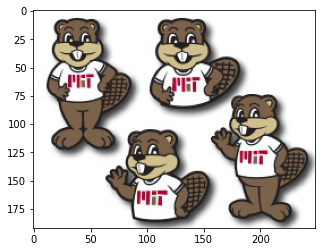

In [27]:
import numpy as np
import matplotlib.pyplot as plt


mystery_img = np.load("resources/mystery-img.npy")
plt.imshow(mystery_img, cmap="gray")
plt.show()
